****
# Introduction #
****

**Private Score: 1.06689**

**This is a competition notebook, this notebook demonstrates my way of solving this problem**

**The goal of this notebook is to correctly predict the Premium Amount**

****
# Dataset Description #
****
**The dataset for this competition (both train and test) was generated from a deep learning model trained on the Insurance Premium Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.**

****
# Reading and Displaying the Training dataset #
****

In [1]:
# importing
import pandas as pd
import numpy as np
import warnings

In [2]:
# Reading and displaying the dataset
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
df=pd.read_csv(r'/kaggle/input/playground-series-s4e12/train.csv')
df

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


****
# Training Data Distribution #
****

In [3]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

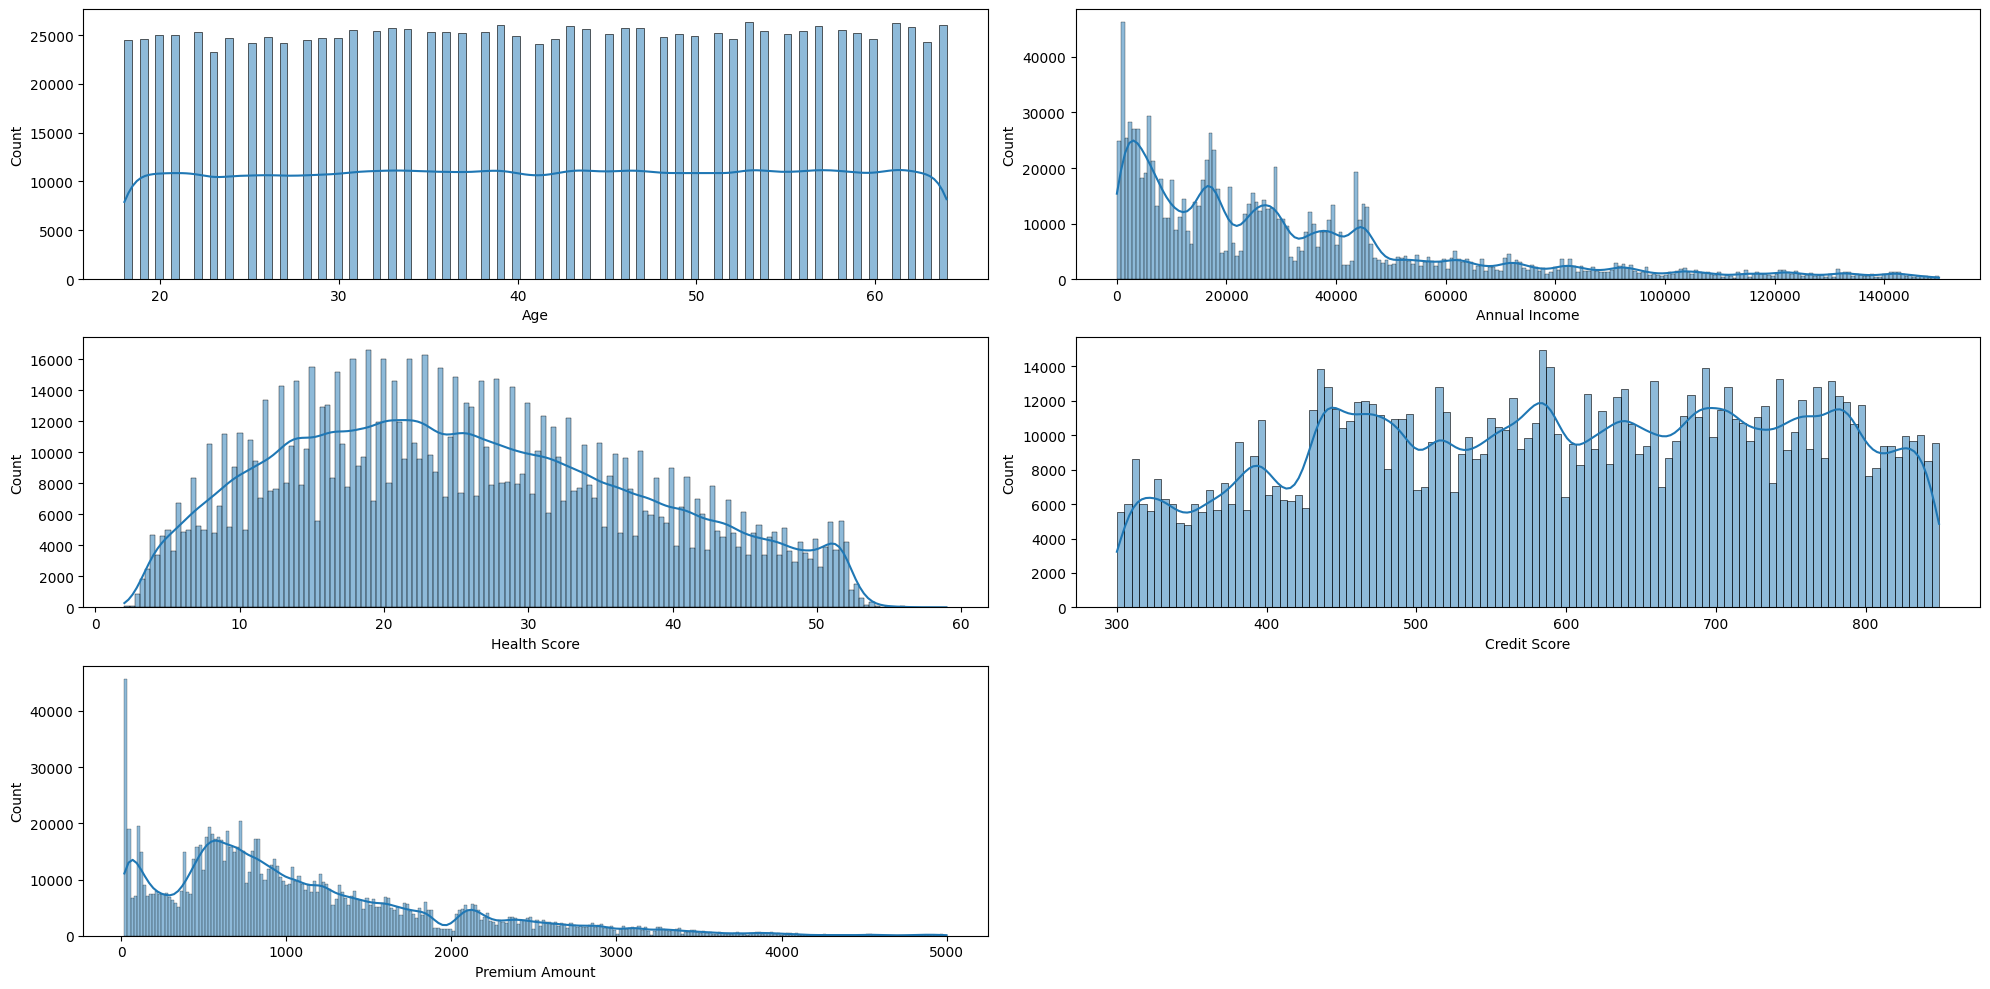

In [5]:
# Let us look at how our continuous features and target variable are distributed

cols=['Age','Annual Income','Health Score','Credit Score','Premium Amount']
fig,ax=plt.subplots(3,2,figsize=(20,10))
ax=ax.flatten()
i=0
for col in cols:
    sns.histplot(data=df,x=col,ax=ax[i],kde=True)
    i+=1

ax[5].axis('off')
plt.tight_layout()
plt.show()

In [6]:
df.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

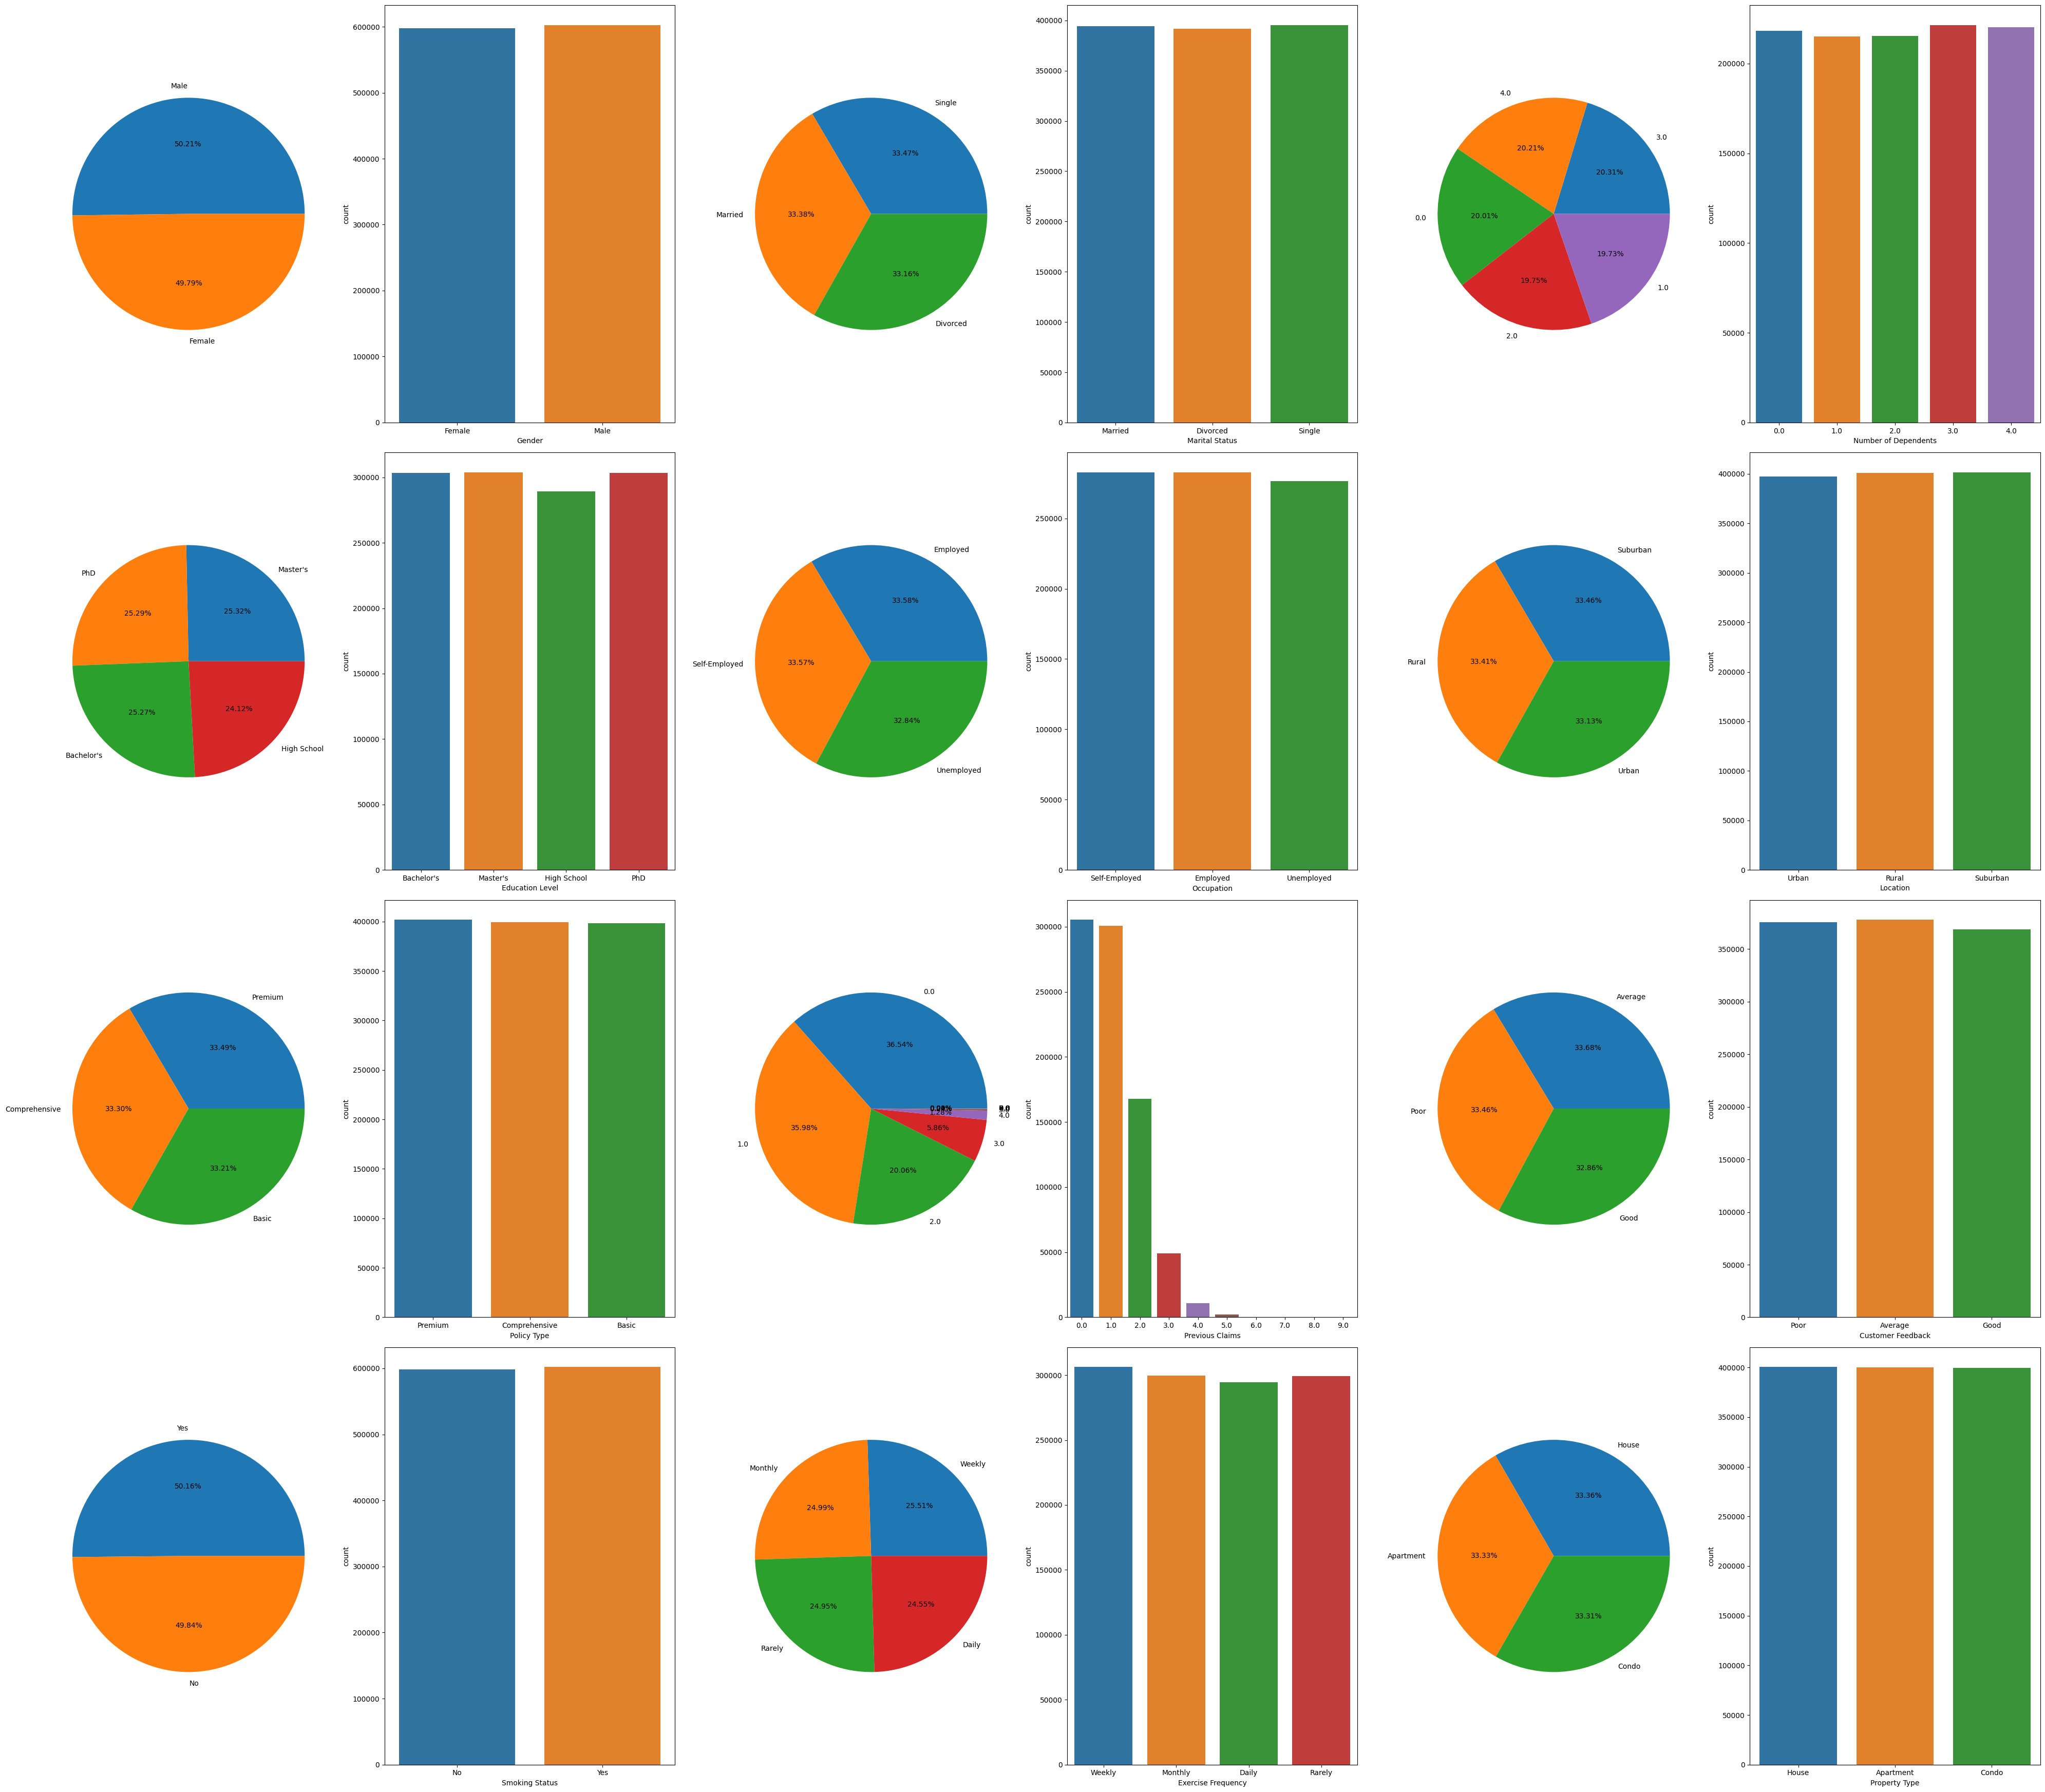

In [7]:
# Now let us take a look at some of our categorical features distribution

cols1=['Gender','Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation','Location', 'Policy Type', 'Previous Claims',
      'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type','Insurance Duration','Vehicle Age']
fig, ax = plt.subplots(4, 6, figsize=(40, 35))
ax = ax.flatten()
i = 0
for col in cols1:
    tdf = df[col].value_counts().reset_index()
    tdf.columns = ['label', 'count']
    if i < len(ax):
        ax[i].pie(x=tdf['count'], labels=tdf['label'], autopct='%.2f%%')
        i += 1
        if i < len(ax):
            sns.countplot(data=df, x=col, ax=ax[i])
            i += 1
ax[14].axis('off')
plt.tight_layout()
plt.show()


****
# Training Data Preprocessing #
****

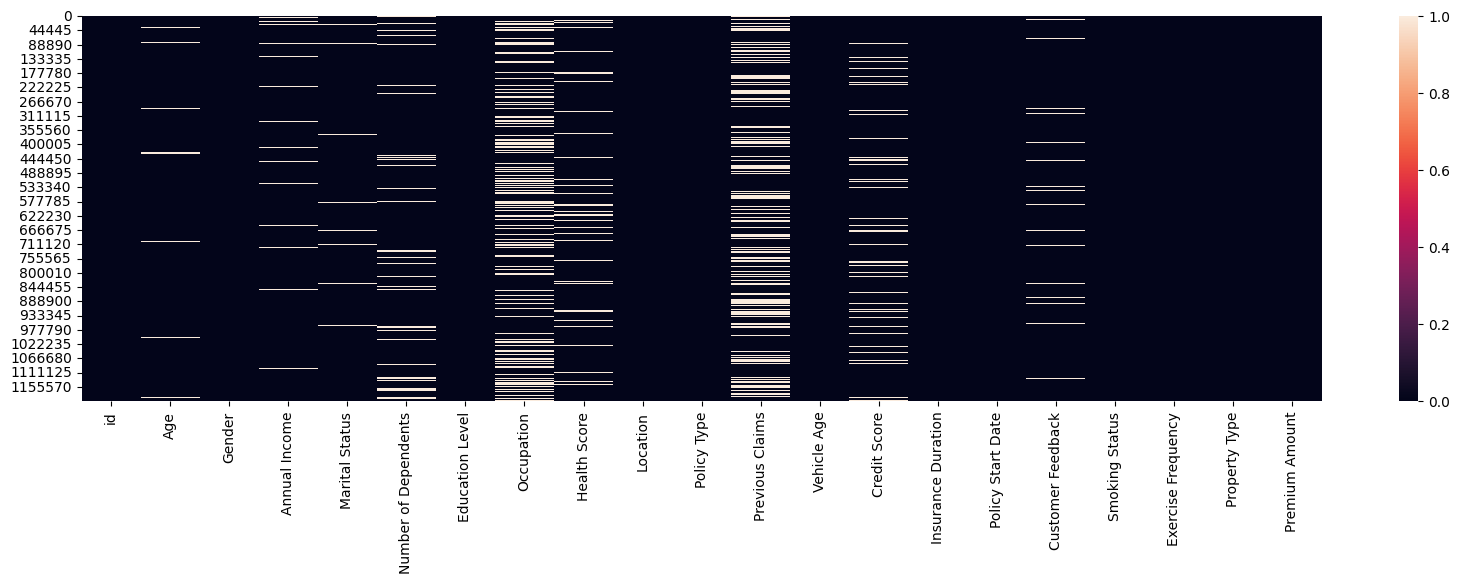

In [8]:
# Checking for any null values
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull())
plt.show()

In [9]:
# Finding the percentage of null values
tdf = pd.DataFrame({
    'Cols': df.columns,  
    'percentage': ((df.isnull().sum()) / df.shape[0]*100)
})
tdf.sort_values(by='percentage',ascending=False,inplace=True)
tdf

,Cols,percentage
Previous Claims,Previous Claims,30.335750
Occupation,Occupation,29.839583
Credit Score,Credit Score,11.490167
Number of Dependents,Number of Dependents,9.139333
Customer Feedback,Customer Feedback,6.485333
Health Score,Health Score,6.173000
Annual Income,Annual Income,3.745750
Age,Age,1.558750
Marital Status,Marital Status,1.544083
Vehicle Age,Vehicle Age,0.000500


In [10]:
# Taking care of the null values by fillind it with median and mode
df['Previous Claims']=df['Previous Claims'].fillna(df['Previous Claims'].mode()[0])
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Credit Score']=df['Credit Score'].fillna(df['Credit Score'].median())
df['Customer Feedback']=df['Customer Feedback'].fillna(df['Customer Feedback'].mode()[0])
df['Number of Dependents']=df['Number of Dependents'].fillna(df['Number of Dependents'].mode()[0])
df['Health Score']=df['Health Score'].fillna(df['Health Score'].median())
df['Annual Income']=df['Annual Income'].fillna(df['Annual Income'].median())
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Marital Status']=df['Marital Status'].fillna(df['Marital Status'].mode()[0])
df['Vehicle Age']=df['Vehicle Age'].fillna(df['Vehicle Age'].median())
df['Insurance Duration']=df['Insurance Duration'].fillna(df['Insurance Duration'].mode()[0])

In [11]:
tdf = pd.DataFrame({
    'Cols': df.columns,  
    'percentage': ((df.isnull().sum()) / df.shape[0]) *100 
})
tdf.sort_values(by='percentage',ascending=False,inplace=True)
tdf['percentage']=tdf['percentage'].astype(int)
tdf

,Cols,percentage
id,id,0
Previous Claims,Previous Claims,0
Property Type,Property Type,0
Exercise Frequency,Exercise Frequency,0
Smoking Status,Smoking Status,0
Customer Feedback,Customer Feedback,0
Policy Start Date,Policy Start Date,0
Insurance Duration,Insurance Duration,0
Credit Score,Credit Score,0
Vehicle Age,Vehicle Age,0


In [12]:
# Splitting our Policy Start Date feature into Year, Month and Date
df[['Year', 'Month', 'Date']]=df['Policy Start Date'].str.split('-',expand=True)

In [13]:
df

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Year,Month,Date
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0,2023,12,23 15:21:39.134960
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Employed,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0,2023,06,12 15:21:39.111551
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,595.0,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0,2023,09,30 15:21:39.221386
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Employed,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0,2024,06,12 15:21:39.226954
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0,2021,12,01 15:21:39.252145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,0.0,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0,2023,05,03 15:21:39.257696
1199996,1199996,54.0,Male,35786.0,Divorced,3.0,Master's,Self-Employed,11.483482,Rural,Comprehensive,0.0,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0,2022,09,10 15:21:39.134960
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,Employed,14.724469,Suburban,Basic,0.0,19.0,595.0,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0,2021,05,25 15:21:39.106582
1199998,1199998,55.0,Male,23911.0,Single,1.0,PhD,Employed,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0,2021,09,19 15:21:39.190215


In [14]:
# Splitting our Date feature into date and time
df.drop(columns='Policy Start Date',inplace=True)
df[['date','time']]=df['Date'].str.split(' ',expand=True)

In [15]:
# Splitting the time feature into Hour, Min and Seconds
df.drop(columns='Date',inplace=True)
df[['Hour','Min','Seconds']]=df['time'].str.split(':',expand=True)
df.drop(columns='time',inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1200000 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1200000 non-null  float64
 4   Marital Status        1200000 non-null  object 
 5   Number of Dependents  1200000 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            1200000 non-null  object 
 8   Health Score          1200000 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       1200000 non-null  float64
 12  Vehicle Age           1200000 non-null  float64
 13  Credit Score          1200000 non-null  float64
 14  Insurance Duration    1200000 non-

In [17]:
#Converting to integer datatype
df[['Year','Month','date','Hour','Min']]=df[['Year','Month','date','Hour','Min']].astype(int)

In [18]:
df['Seconds']=df['Seconds'].astype(float)
df.drop(columns=['Hour','Min'],inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1200000 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1200000 non-null  float64
 4   Marital Status        1200000 non-null  object 
 5   Number of Dependents  1200000 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            1200000 non-null  object 
 8   Health Score          1200000 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       1200000 non-null  float64
 12  Vehicle Age           1200000 non-null  float64
 13  Credit Score          1200000 non-null  float64
 14  Insurance Duration    1200000 non-

In [20]:
cols = df.select_dtypes(include=['object']).columns
for col in cols:
    print(df[col].value_counts(),'\n')

Gender
Male      602571
Female    597429
Name: count, dtype: int64 

Marital Status
Single      413920
Married     394316
Divorced    391764
Name: count, dtype: int64 

Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64 

Occupation
Employed         640825
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64 

Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64 

Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64 

Customer Feedback
Average    455729
Poor       375518
Good       368753
Name: count, dtype: int64 

Smoking Status
Yes    601873
No     598127
Name: count, dtype: int64 

Exercise Frequency
Weekly     306179
Monthly    299830
Rarely     299420
Daily      294571
Name: count, dtype: int64 

Property Type
House        400349
Apartment    399978
Condo        399673
Name: count, dtype

In [21]:
# Encoding all the categorical features
# We can also use One Hot Encoding to convert the categorical columns into Binary, but the complexity increases
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1200000 non-null  float64
 2   Gender                1200000 non-null  int64  
 3   Annual Income         1200000 non-null  float64
 4   Marital Status        1200000 non-null  int64  
 5   Number of Dependents  1200000 non-null  float64
 6   Education Level       1200000 non-null  int64  
 7   Occupation            1200000 non-null  int64  
 8   Health Score          1200000 non-null  float64
 9   Location              1200000 non-null  int64  
 10  Policy Type           1200000 non-null  int64  
 11  Previous Claims       1200000 non-null  float64
 12  Vehicle Age           1200000 non-null  float64
 13  Credit Score          1200000 non-null  float64
 14  Insurance Duration    1200000 non-

In [23]:
df.isnull().any()

id                      False
Age                     False
Gender                  False
Annual Income           False
Marital Status          False
Number of Dependents    False
Education Level         False
Occupation              False
Health Score            False
Location                False
Policy Type             False
Previous Claims         False
Vehicle Age             False
Credit Score            False
Insurance Duration      False
Customer Feedback       False
Smoking Status          False
Exercise Frequency      False
Property Type           False
Premium Amount          False
Year                    False
Month                   False
date                    False
Seconds                 False
dtype: bool

In [24]:
df

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Year,Month,date,Seconds
0,0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,2,2.0,17.0,372.0,5.0,2,0,3,2,2869.0,2023,12,23,39.134960
1,1,39.0,0,31678.0,0,3.0,2,0,15.569731,0,1,1.0,12.0,694.0,2.0,0,1,1,2,1483.0,2023,6,12,39.111551
2,2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,2,1.0,14.0,595.0,3.0,1,1,3,2,567.0,2023,9,30,39.221386
3,3,21.0,1,141855.0,1,2.0,0,0,10.938144,0,0,1.0,0.0,367.0,1.0,2,1,0,0,765.0,2024,6,12,39.226954
4,4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,2,0.0,8.0,598.0,4.0,2,1,3,2,2022.0,2021,12,1,39.252145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,0,27316.0,1,0.0,2,2,13.772907,2,2,0.0,5.0,372.0,3.0,2,0,0,0,1303.0,2023,5,3,39.257696
1199996,1199996,54.0,1,35786.0,0,3.0,2,1,11.483482,0,1,0.0,10.0,597.0,4.0,2,0,3,0,821.0,2022,9,10,39.134960
1199997,1199997,19.0,1,51884.0,0,0.0,2,0,14.724469,1,0,0.0,19.0,595.0,6.0,1,0,1,1,371.0,2021,5,25,39.106582
1199998,1199998,55.0,1,23911.0,2,1.0,3,0,18.547381,1,2,1.0,7.0,407.0,4.0,2,0,0,0,596.0,2021,9,19,39.190215


****
# Reading and Displaying the Testing Dataset #
****

In [25]:
# Reading and displaying Testing data
te=pd.read_csv(r"/kaggle/input/playground-series-s4e12/test.csv")
te

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,1999998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


****
# Testing Data Distribution #
****

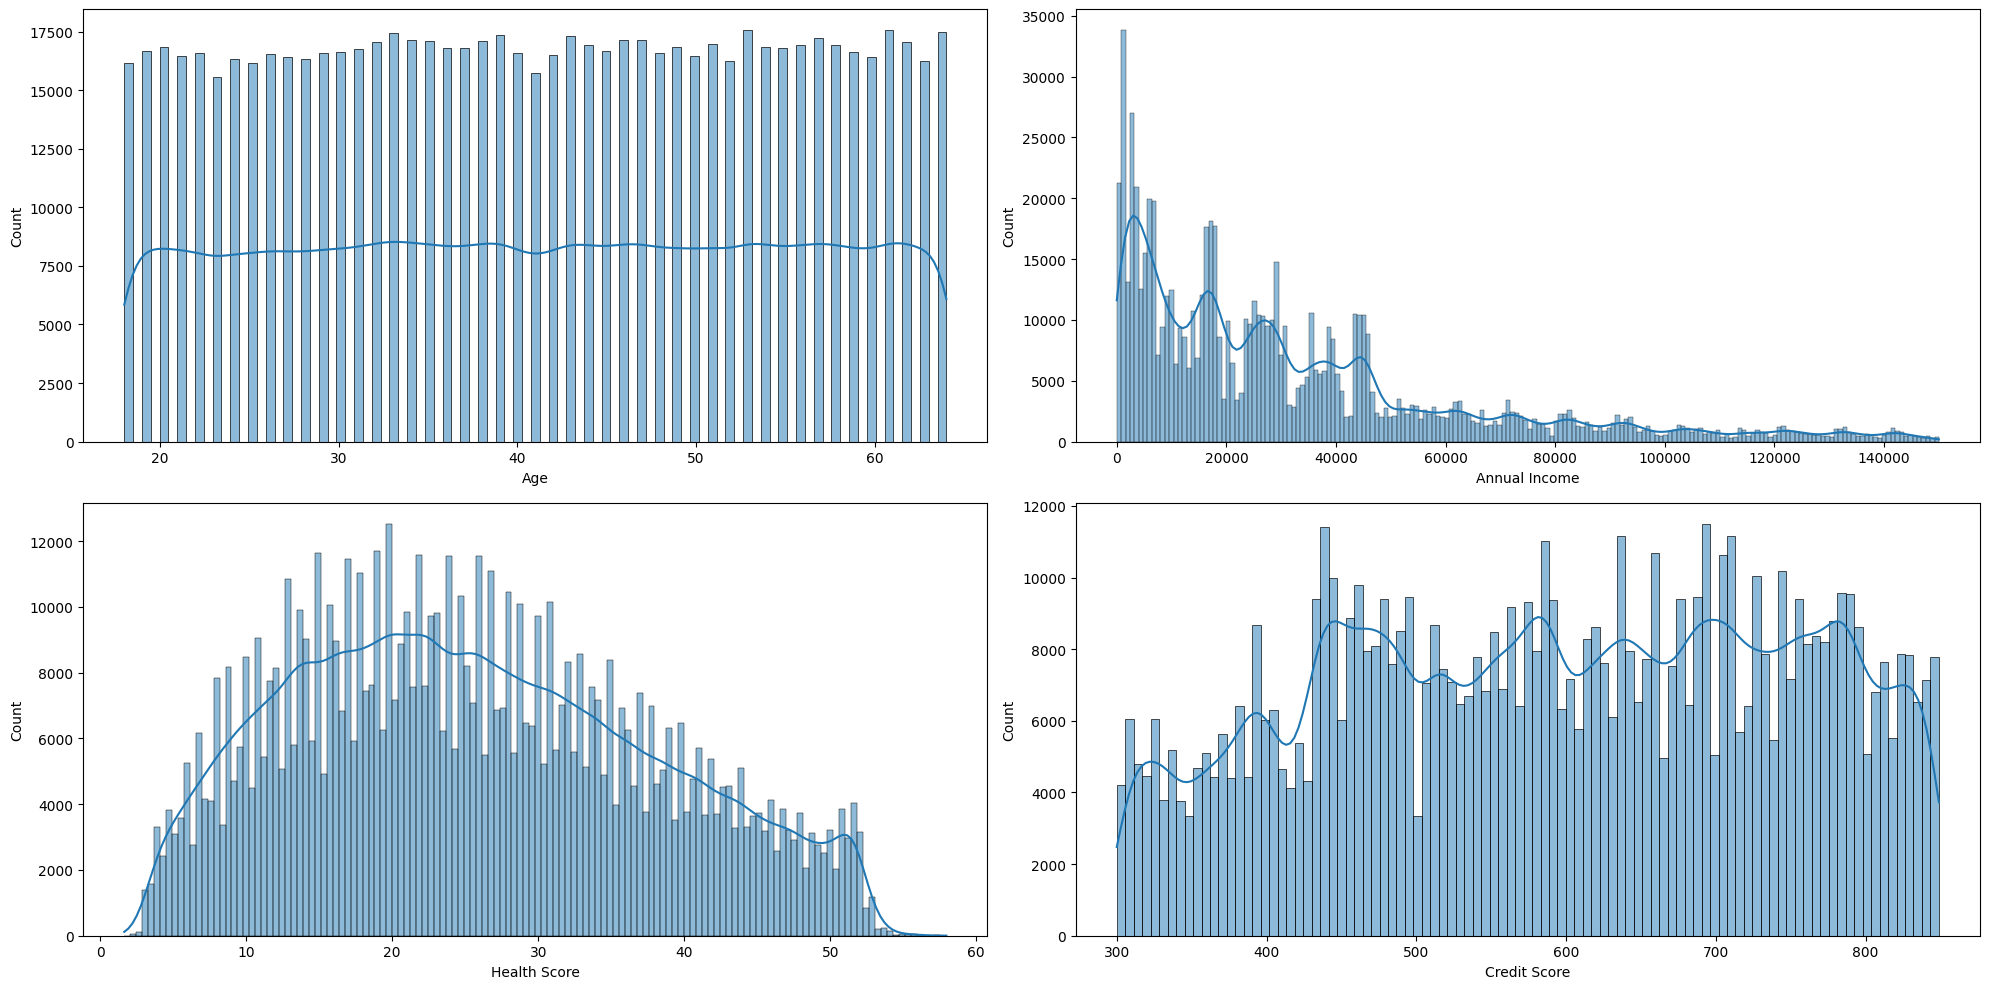

In [26]:
# Let us look at how our continuous features and target variable are distributed

cols=['Age','Annual Income','Health Score','Credit Score']
fig,ax=plt.subplots(2,2,figsize=(20,10))
ax=ax.flatten()
i=0
for col in cols:
    sns.histplot(data=te,x=col,ax=ax[i],kde=True)
    i+=1
plt.tight_layout()
plt.show()

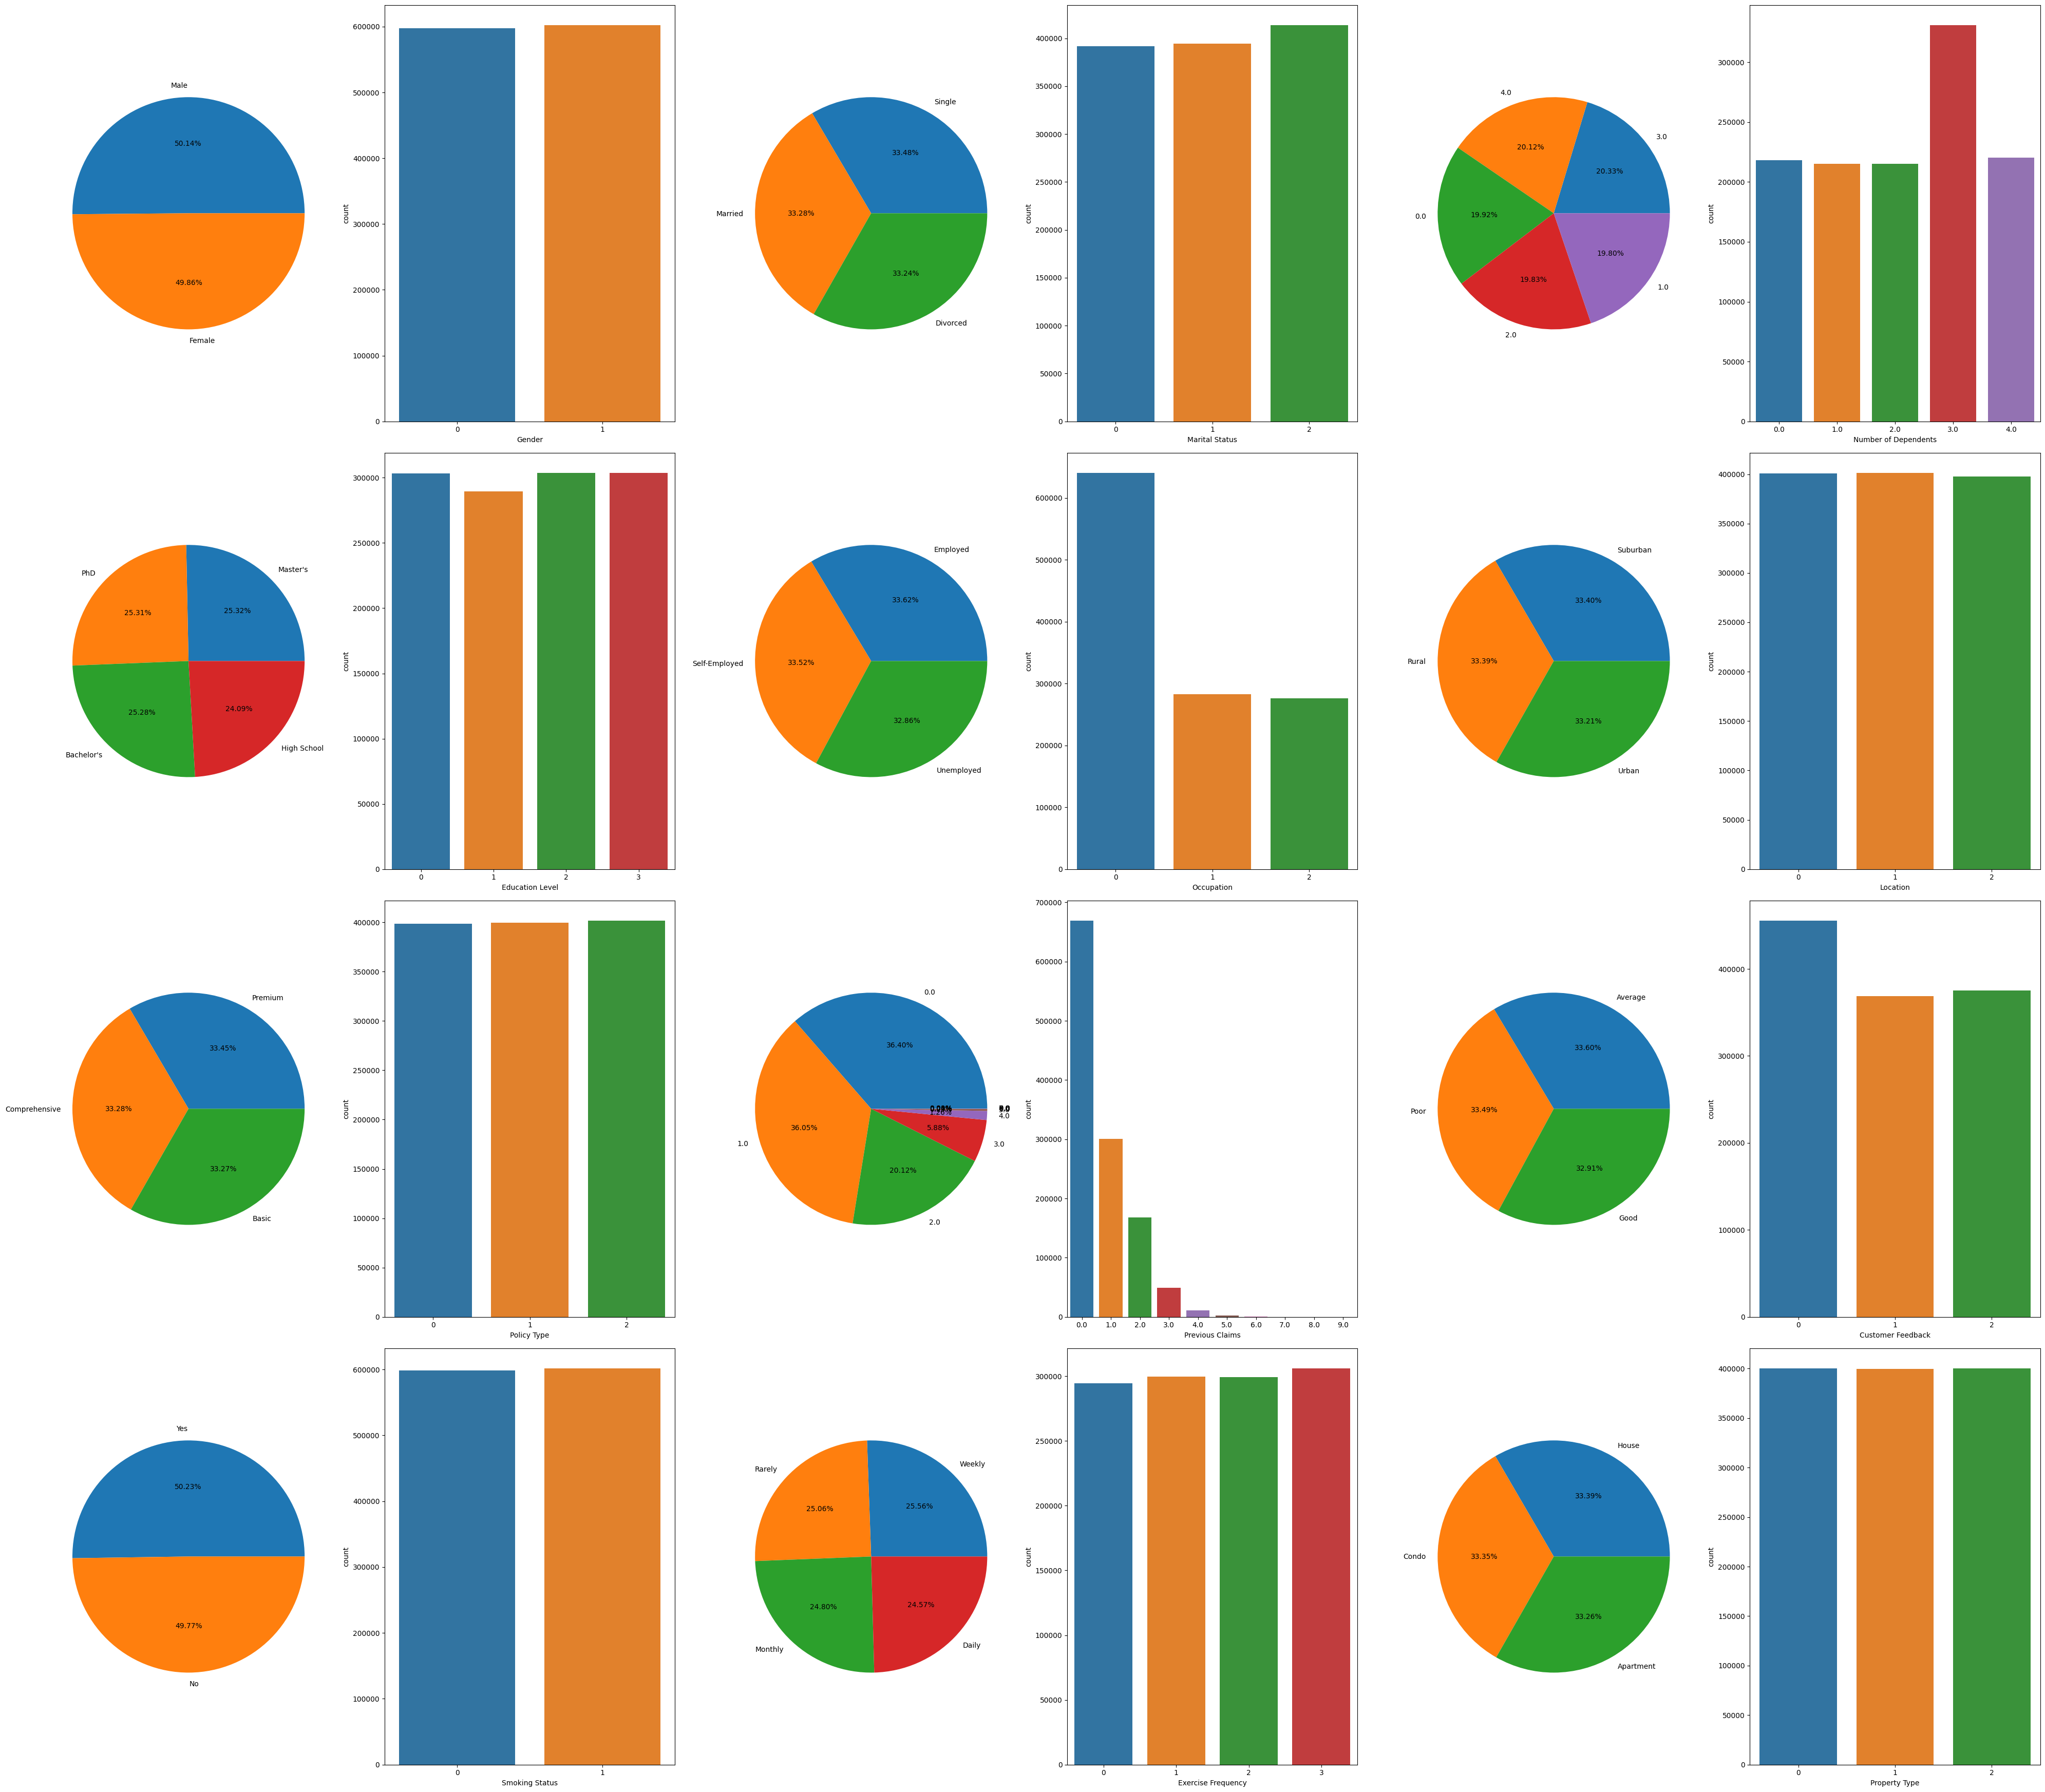

In [27]:
# Now let us take a look at some of our categorical features distribution

cols1=['Gender','Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation','Location', 'Policy Type', 'Previous Claims',
      'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type','Insurance Duration','Vehicle Age']
fig, ax = plt.subplots(4, 6, figsize=(40, 35))
ax = ax.flatten()
i = 0
for col in cols1:
    tdf = te[col].value_counts().reset_index()
    tdf.columns = ['label', 'count']
    if i < len(ax):
        ax[i].pie(x=tdf['count'], labels=tdf['label'], autopct='%.2f%%')
        i += 1
        if i < len(ax):
            sns.countplot(data=df, x=col, ax=ax[i])
            i += 1
ax[14].axis('off')
plt.tight_layout()
plt.show()

****
# Testing Data Preprocessing #
****

In [28]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [29]:
te['Previous Claims']=te['Previous Claims'].fillna(te['Previous Claims'].mode()[0])
te['Occupation']=te['Occupation'].fillna(te['Occupation'].mode()[0])
te['Credit Score']=te['Credit Score'].fillna(te['Credit Score'].median())
te['Customer Feedback']=te['Customer Feedback'].fillna(te['Customer Feedback'].mode()[0])
te['Number of Dependents']=te['Number of Dependents'].fillna(te['Number of Dependents'].mode()[0])
te['Health Score']=te['Health Score'].fillna(te['Health Score'].median())
te['Annual Income']=te['Annual Income'].fillna(te['Annual Income'].median())
te['Age']=te['Age'].fillna(te['Age'].mode()[0])
te['Marital Status']=te['Marital Status'].fillna(te['Marital Status'].mode()[0])
te['Vehicle Age']=te['Vehicle Age'].fillna(te['Vehicle Age'].median())
te['Insurance Duration']=te['Insurance Duration'].fillna(te['Insurance Duration'].mode()[0])
te[['Year', 'Month', 'Date']]=te['Policy Start Date'].str.split('-',expand=True)
te.drop(columns='Policy Start Date',inplace=True)
te[['date','time']]=te['Date'].str.split(' ',expand=True)
te.drop(columns='Date',inplace=True)
te[['Hour','Min','Seconds']]=te['time'].str.split(':',expand=True)
te.drop(columns='time',inplace=True)

In [30]:
te[['Year','Month','date','Hour','Min']]=te[['Year','Month','date','Hour','Min']].astype(int)
te['Seconds']=df['Seconds'].astype(float)

In [31]:
cols = te.select_dtypes(include=['object']).columns
cols
le=LabelEncoder()
for col in cols:
    te[col]=le.fit_transform(te[col])

In [32]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   800000 non-null  float64
 2   Gender                800000 non-null  int64  
 3   Annual Income         800000 non-null  float64
 4   Marital Status        800000 non-null  int64  
 5   Number of Dependents  800000 non-null  float64
 6   Education Level       800000 non-null  int64  
 7   Occupation            800000 non-null  int64  
 8   Health Score          800000 non-null  float64
 9   Location              800000 non-null  int64  
 10  Policy Type           800000 non-null  int64  
 11  Previous Claims       800000 non-null  float64
 12  Vehicle Age           800000 non-null  float64
 13  Credit Score          800000 non-null  float64
 14  Insurance Duration    800000 non-null  float64
 15  

****
# Feature Engineering #
****

In [33]:
# importing
from sklearn.feature_selection import mutual_info_regression

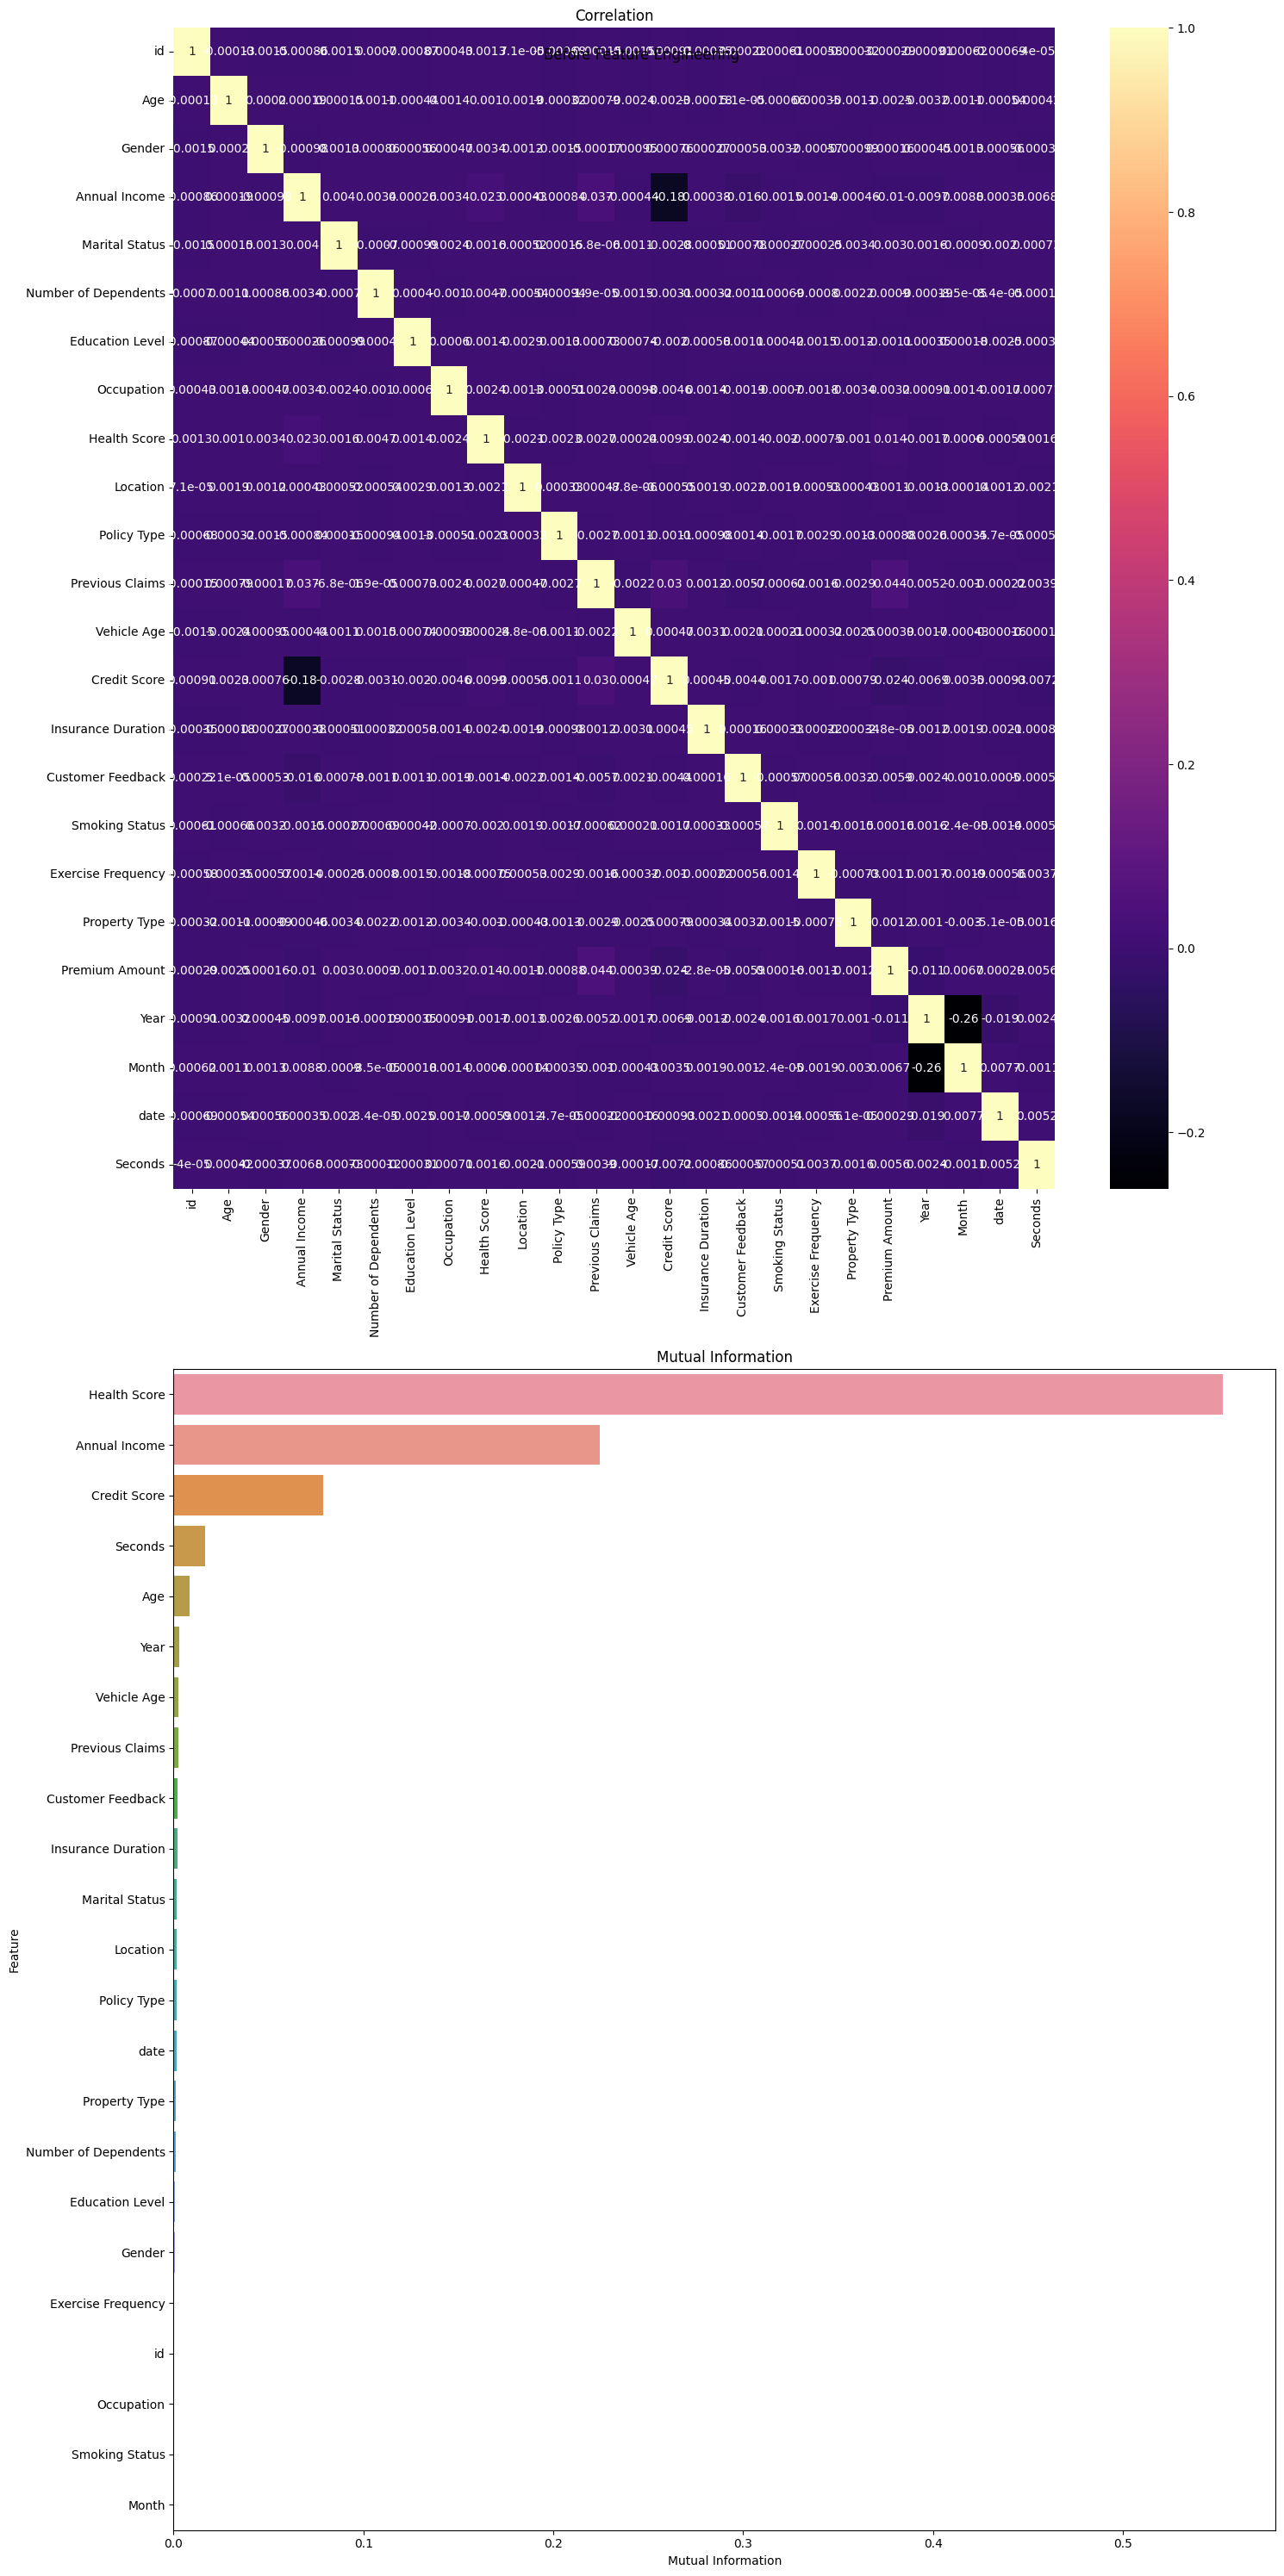

In [34]:
# Now Let us calculate Mutual information and then proceed to visualize correlation along with mutual information
# Calculating Mutual Information
tdf=df.copy()  
x=tdf.drop(columns='Premium Amount')
y=tdf['Premium Amount']
mi=mutual_info_regression(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Visualizing Mutual Information and correlation 
fig,ax=plt.subplots(2,1,figsize=(15,30))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.suptitle('Before Feature Engineering')
plt.show()

In [35]:
# Feature Engineering
df['Avg_Claims'] = df.groupby('id')['Previous Claims'].transform('mean')
df['Claims per Dependent'] = np.where(
    df['Number of Dependents'] == 0, 
    df['Previous Claims'],  
    df['Previous Claims'] / df['Number of Dependents']
)
df['Dependents']=df['Number of Dependents']*df['Number of Dependents']
df['Claims_Square']=df['Previous Claims']*df['Previous Claims']
df['HC_For_Age']=df.groupby('Age')['Health Score'].transform('mean')
df['Claims_Health_Ratio']=df['Previous Claims']/df['Health Score']
df['Income_to_Dependents'] = np.where(
    df['Number of Dependents'] == 0,
    df['Annual Income'], 
    df['Annual Income'] / df['Number of Dependents']
)
df['Claim_Norm']=df['Previous Claims']/(df['Previous Claims'].max())
df['Residual_Income']=df['Annual Income']-df['Previous Claims']
df['Log_Income']=np.log(df['Annual Income'])
df['Life']=2024-df['Year']
df[['s_Year','s_Month','s_date']]=df[['Year','Month','date']].apply(np.sin)
df[['c_Year','c_Month','c_date']]=df[['Year','Month','date']].apply(np.cos)

In [36]:
# Feature Engineering for Testing data
te['Avg_Claims'] = te.groupby('id')['Previous Claims'].transform('mean')
te['Claims per Dependent'] = np.where(
    te['Number of Dependents'] == 0, 
    te['Previous Claims'],  
    te['Previous Claims'] / te['Number of Dependents']
)
te['Dependents'] = te['Number of Dependents'] * te['Number of Dependents']
te['Claims_Square'] = te['Previous Claims'] * te['Previous Claims']
te['HC_For_Age'] = te.groupby('Age')['Health Score'].transform('mean')
te['Claims_Health_Ratio'] = te['Previous Claims'] / te['Health Score']
te['Income_to_Dependents'] = np.where(
    te['Number of Dependents'] == 0,
    te['Annual Income'], 
    te['Annual Income'] / te['Number of Dependents']
)
te['Claim_Norm'] = te['Previous Claims'] / (te['Previous Claims'].max())
te['Residual_Income'] = te['Annual Income'] - te['Previous Claims']
te['Log_Income'] = np.log(te['Annual Income'])
te.drop(columns=['Hour','Min'],inplace=True)
te['Life']=2024-te['Year']
te[['s_Year','s_Month','s_date']]=te[['Year','Month','date']].apply(np.sin)
te[['c_Year','c_Month','c_date']]=te[['Year','Month','date']].apply(np.cos)

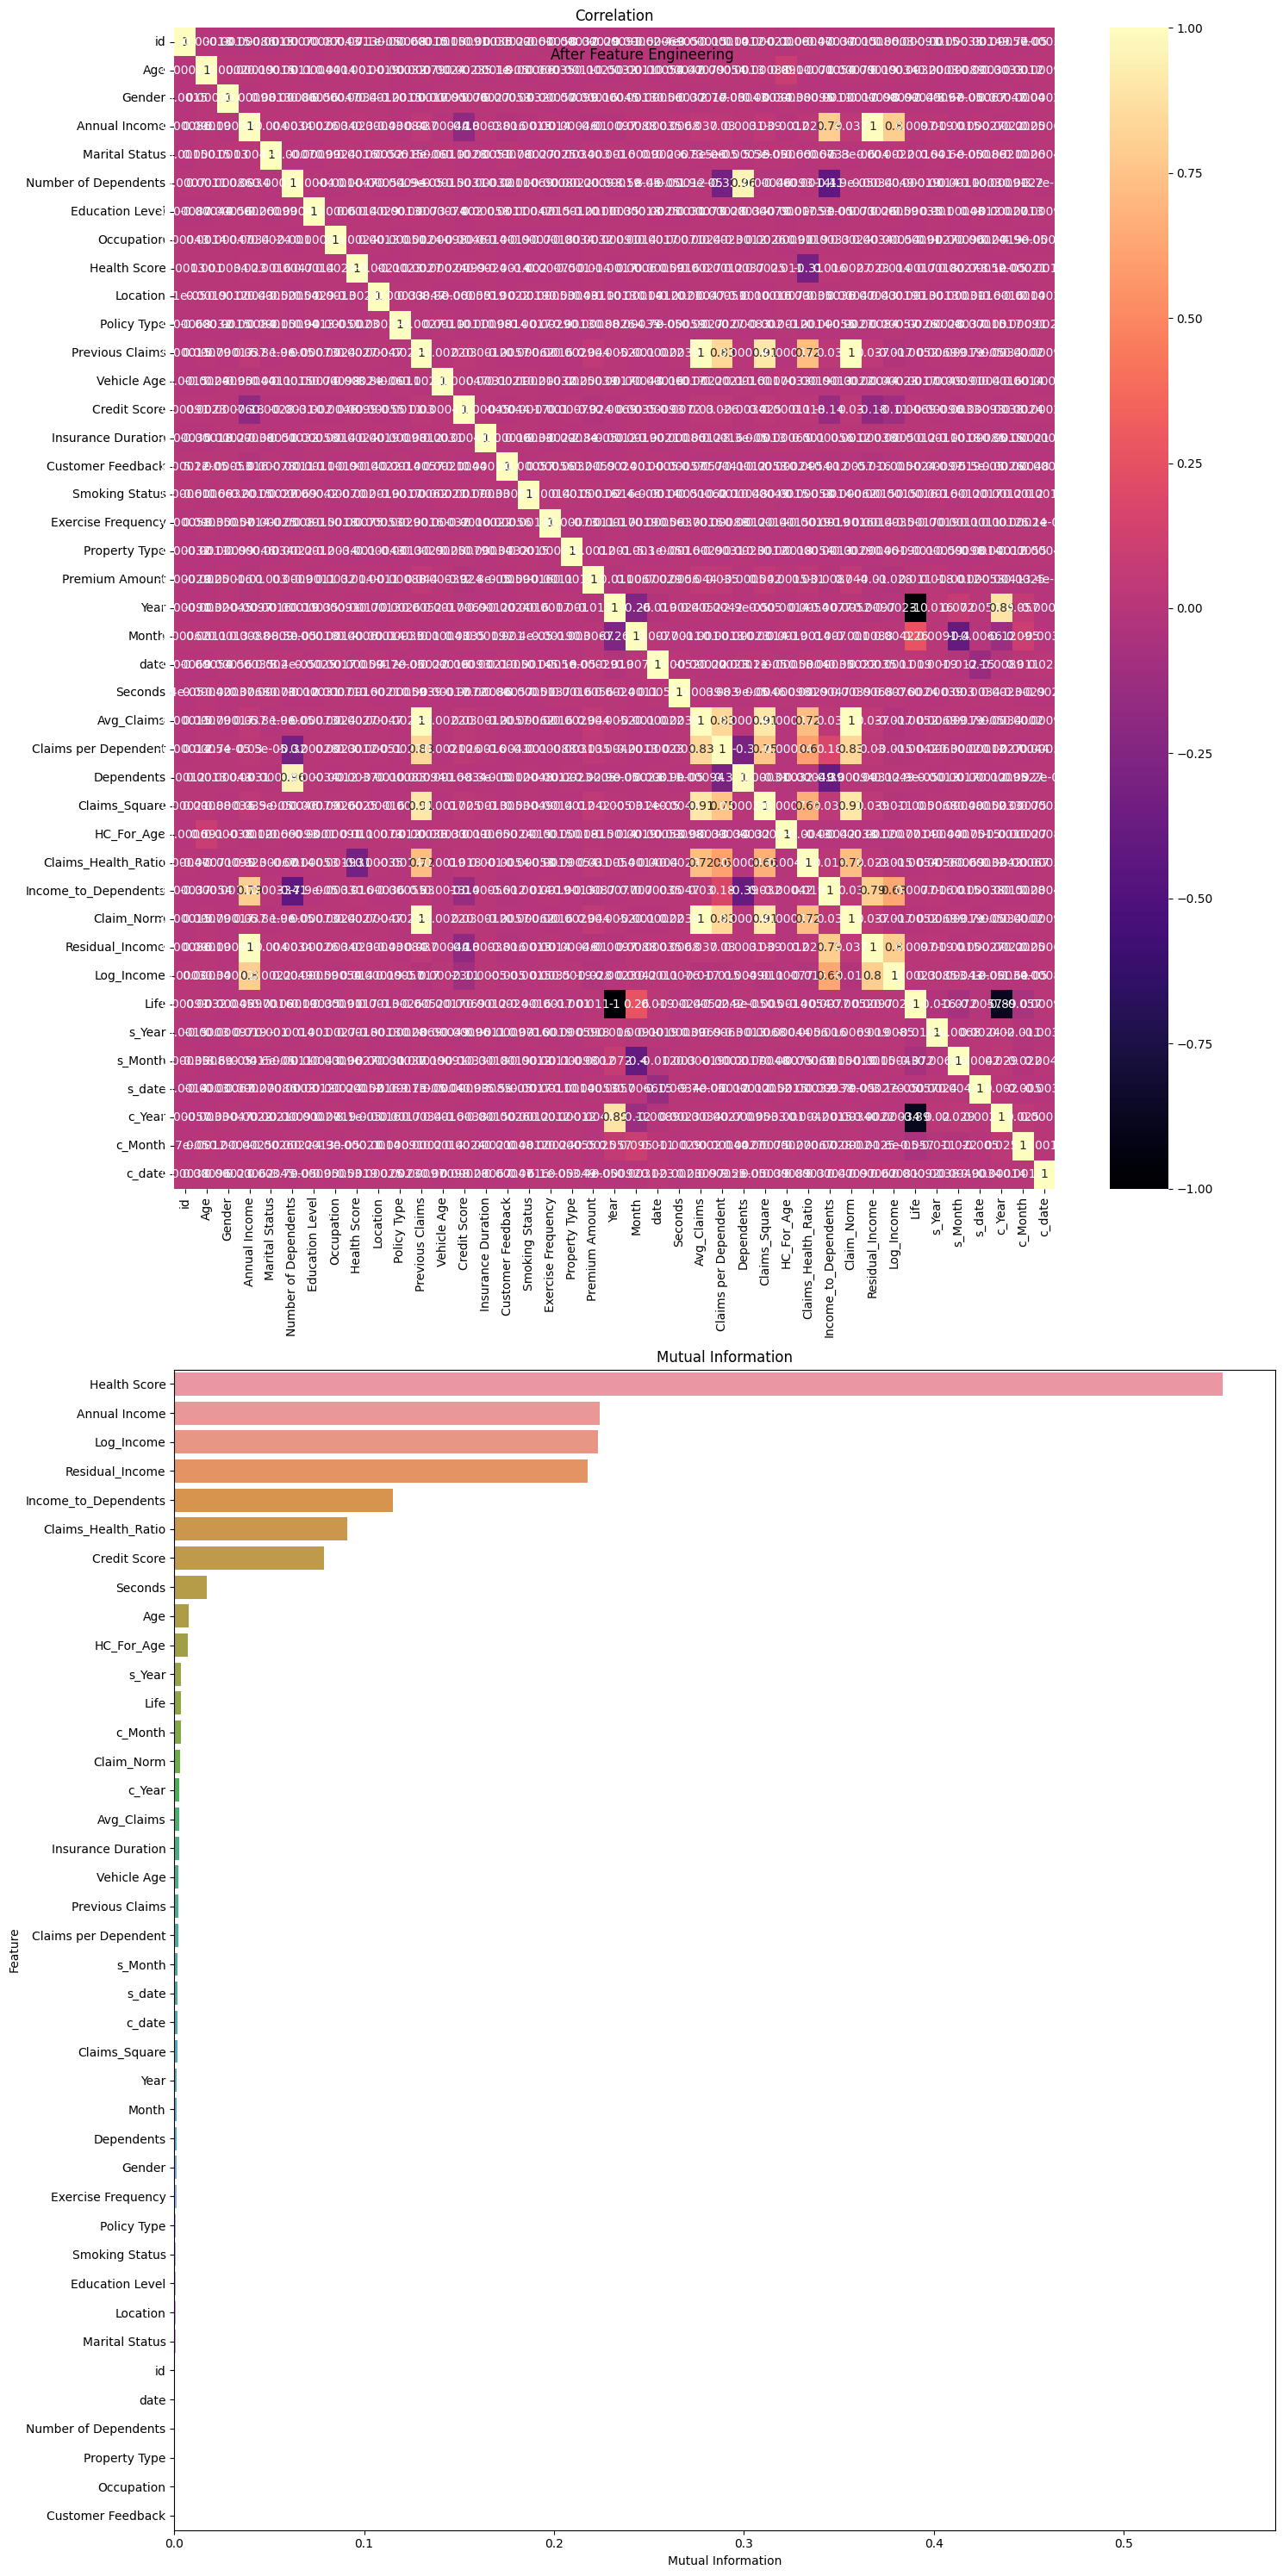

In [37]:
# Mutual Information and Correlation after adding some features
tdf=df.copy()  
x=tdf.drop(columns='Premium Amount')
y=tdf['Premium Amount']
mi=mutual_info_regression(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Visualizing Mutual Information and correlation 
fig,ax=plt.subplots(2,1,figsize=(15,30))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.suptitle('After Feature Engineering')
plt.show()

****
# Data Preparation #
****

In [38]:
# importing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
# Splitting into features and target variable
x_t=df.drop(columns=['Premium Amount','id'])
y_t=df['Premium Amount']

y_t=np.log1p(df['Premium Amount'])
X_test=te.drop('id', axis=1)

# Scaling the Features
ss=StandardScaler()
x_t=ss.fit_transform(x_t)
X_test= ss.transform(X_test)

# Splitting the Training set into Training and Testing set
x_tr,x_te, y_tr,y_te=train_test_split(x_t, y_t, test_size=0.15, random_state=42)

****
# Model - LightBGM #
****

In [40]:
# importing
from lightgbm import LGBMRegressor, early_stopping
from sklearn.model_selection import RandomizedSearchCV

In [41]:
model = LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=7, 
                      random_state=42,num_leaves=225,verbose=-1)
model.fit(x_tr,y_tr, eval_set=[(x_te,y_te)], callbacks=[early_stopping(stopping_rounds=500)])

Training until validation scores don't improve for 500 rounds
Did not meet early stopping. Best iteration is:
[819]	valid_0's l2: 1.10905


LGBMRegressor(learning_rate=0.01, max_depth=7, n_estimators=1000,
              num_leaves=225, random_state=42, verbose=-1)

In [42]:
# Predicting
# Predict on Test Data
pred=model.predict(X_test)
pred= np.expm1(pred)

****
# Submission #
****

In [43]:
# Submission
submission = pd.DataFrame({'id': te['id'], 'Premium Amount':pred})
submission.to_csv('submission.csv', index=False)

****
# Feedback and Suggestions #
****

**If you liked this notebook or if you found it Helpful Kindly Upvote :)**

**Please provide feedback and Suggestions to improve this notebook**